# ARMA para mid term

Se importan las librerías.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
import tensorflow as tf

El modelo ARMA más simple considera el valor de la variable y el error del período anterior. 

$x_{t}=c+ϕ_{1} x_{t-1}+θ _{1} ϵ _{t-1}+ϵ_{t}$

Donde $ϵ _{t-1}$ es el error del período anterior.

Considerando las siguientes restricciones:

$|θ_{1}|<1$

$| ϕ_{1} | < 1$

El modelo ARMAX considera un vector para las variables exógenas.

$x_{t}=c+ϕ_{1} +βX+ x_{t-1}+θ _{1} ϵ _{t-1}+ϵ_{t}$

Donde $X$ representa el valor de las variables exógenas.

## Implementación

Promedio semanal
Entrenamiento
En evaluación, alimentar el modelo con los datos predictivos LSTM. 

### ARMA

Se importan los datos

In [2]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_train_2015.csv', index_col=0, parse_dates=True)
df = df.asfreq('h')
df = df.between_time('08:00:00','17:00:00')
df = df[['SRGLOAVG1H','TAMAX1H','TAMIN1H','RHMAX1H','RHMIN1H','PRSUM1H','PAAVG1H','PAMAX1H','PAMIN1H','WS1HA','WS1HX','WD1HA']]
df_test = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_test_2015.csv', index_col=0, parse_dates=True)
df_test = df_test.asfreq('h')
df_test = df_test.between_time('08:00:00','17:00:00')
df_test = df_test[['SRGLOAVG1H','TAMAX1H','TAMIN1H','RHMAX1H','RHMIN1H','PRSUM1H','PAAVG1H','PAMAX1H','PAMIN1H','WS1HA','WS1HX','WD1HA']]

In [3]:
len(df)

5850

In [4]:
df.head()

,SRGLOAVG1H,TAMAX1H,TAMIN1H,RHMAX1H,RHMIN1H,PRSUM1H,PAAVG1H,PAMAX1H,PAMIN1H,WS1HA,WS1HX,WD1HA
Local_Time,,,,,,,,,,,,
2015-01-01 08:00:00,107.0,12.2,9.5,96.0,89.0,0.0,743.5,743.7,743.1,2.5,4.6,42
2015-01-01 09:00:00,394.0,15.1,12.2,89.0,76.0,0.0,743.8,743.9,743.7,3.3,5.8,59
2015-01-01 10:00:00,728.0,18.1,15.1,79.0,57.0,0.0,743.7,743.9,743.4,4.4,8.4,40
2015-01-01 11:00:00,428.0,18.4,16.7,66.0,58.0,0.0,743.2,743.4,742.8,4.0,8.1,35
2015-01-01 12:00:00,403.0,18.5,17.2,65.0,55.0,0.0,742.6,742.9,742.3,3.5,7.6,34


Se instala la librería para el stepwise.

In [5]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 9.2 MB/s 
     |████████████████████████████████| 9.8 MB 47.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Se importa la librería.

In [6]:
from pmdarima.arima import auto_arima

## Promedio semanal

Se va a obtener el promedio de 70 horas para todos los datos del dataset. Esto es porque el día dura 10 horas, en este ejercicio, y 70 horas equivale a una semana.

In [7]:
df_semanal = df.rolling(window=70).mean()

Se quitan los datos nulos del principio.

In [8]:
df_semanal = df_semanal.iloc[70:]

In [9]:
df_semanal.shape

(5780, 12)

Para el modelo ARMA se utilizará sólo la radiación solar.

In [10]:
df_rs = df_semanal['SRGLOAVG1H']

In [11]:
df_rs

Local_Time
2015-01-08 08:00:00    372.400000
2015-01-08 09:00:00    371.942857
2015-01-08 10:00:00    371.185714
2015-01-08 11:00:00    374.857143
2015-01-08 12:00:00    383.200000
                          ...    
2016-08-07 13:00:00    368.785714
2016-08-07 14:00:00    370.085714
2016-08-07 15:00:00    371.185714
2016-08-07 16:00:00    373.828571
2016-08-07 17:00:00    374.857143
Name: SRGLOAVG1H, Length: 5780, dtype: float64

Se quiere predecir el promedio de la semana siguiente, así que se trabajará con valores obtenidos cada 70 filas.

In [12]:
promedios_semanales = [df_rs[i] for i in range(0,len(df_rs),70)]

In [13]:
promedios_semanales[:5]

[372.4,
 443.48571428571427,
 430.77142857142854,
 397.07142857142856,
 384.12857142857143]

Hay datos de 83 semanas.

In [14]:
len(promedios_semanales)

83

Se buscan los mejores parámetros para el modelo.

In [ ]:
stepwise_model = auto_arima(promedios_semanales,seasonal=False,max_order=None,max_p = 10, max_q = 10)

El mejor modelo tiene 1 retraso AR.

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -471.929
Date:                Fri, 22 Apr 2022   AIC                            949.857
Time:                        15:17:21   BIC                            957.114
Sample:                             0   HQIC                           952.772
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    325.5886     55.312      5.886      0.000     217.179     433.998
ar.L1          0.1789      0.136      1.314      0.189      -0.088       0.446
sigma2      5082.1123    609.201      8.342      0.000    3888.100    6276.124
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                39.46
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             1.09
Prob(H) (two-sided):                  0.61   Kurtosis:                         5.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARMAX automatiza feature selection
Stepwise Regression in Python

## Datos de prueba

Se preparan los datos de testing

Se sacan promedios de 70 horas.

In [ ]:
df_semanal_test = df_test.rolling(window=70).mean()

Se quitan los datos nulos

In [ ]:
df_semanal_test = df_semanal_test.iloc[70:]

Se selecciona sólo la radiación solar.

In [ ]:
df_rs_test = df_semanal_test['SRGLOAVG1H']

Se toman valores semanales.

In [ ]:
promedios_semanales_test = [df_rs_test[i] for i in range(0,len(df_rs_test),70)]

Se tienen 20 semanas de prueba.

In [ ]:
len(promedios_semanales_test)

20

Se utilizan los parámetros del modelo entrenado para realizar el test.

In [ ]:
params = stepwise_model.params()
params

array([3.25588598e+02, 1.78922505e-01, 5.08211228e+03])

Se importa la librería para implementar el modelo de prueba.

In [27]:
import statsmodels.api as sm

In [ ]:
test = np.array(promedios_semanales_test)

Se coloca sólo el último valor de los datos de prueba, ya que el modelo sólo necesita un retraso.

In [ ]:
modelB = sm.tsa.SARIMAX([promedios_semanales[-1]], order=(1, 0, 0))
resB = modelB.smooth(params[1:]) # se ignora la constante

Se puede observar que el modelo predice el mismo valor que el modelo original.

In [ ]:
# modelo original
stepwise_model.predict(1)

array([375.27282192])

In [ ]:
# modelo reconstruido para test
resB.forecast(1)+params[0]

array([375.27282192])

Se utiliza el modelo de test en todos los datos de test.

In [ ]:
predictions = []

In [ ]:
for i in range(len(promedios_semanales_test)-1):  
  modelB = sm.tsa.SARIMAX([promedios_semanales_test[i]], order=(1, 0, 0))
  resB = modelB.smooth(params[1:]) # se ignora la constante
  predictions.append((resB.forecast(1))[0])

In [ ]:
predictions = np.array(predictions)

In [ ]:
predictions+=params[0] # se suma la constante

In [ ]:
predictions[:3]

array([402.09330543, 405.31391052, 412.55004783])

In [ ]:
len(predictions)

19

Se quita el primer valor de test porque no hay predicción para éste.

In [ ]:
MSE = mean_squared_error(promedios_semanales_test[1:],predictions)
np.sqrt(MSE)

125.98464549957141

In [ ]:
mean_absolute_error(promedios_semanales_test[1:],predictions)

96.74743620069883

In [ ]:
df_resultados = {
    'real':promedios_semanales_test[1:],
    'prediction':predictions
}

In [ ]:
df_resultados = pd.DataFrame(df_resultados)

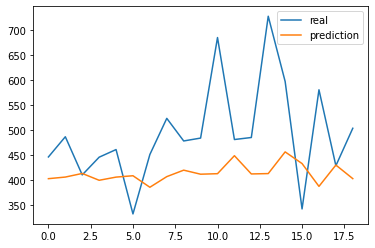

In [ ]:
df_resultados.plot()

## Utilizando menos días

Se utilizan menos días para que existan más datos.

### 5 días.

In [36]:
dias = 5

Se sacan promedios de 50 horas.

In [37]:
df_semanal = df.rolling(window=10*dias).mean()

In [38]:
df_semanal = df_semanal.iloc[10*dias:]

In [39]:
df_semanal.head(1)

,SRGLOAVG1H,TAMAX1H,TAMIN1H,RHMAX1H,RHMIN1H,PRSUM1H,PAAVG1H,PAMAX1H,PAMIN1H,WS1HA,WS1HX,WD1HA
Local_Time,,,,,,,,,,,,
2015-01-06 08:00:00,362.22,16.722,15.03,71.44,61.04,0.0,742.36,742.592,742.138,4.696,10.142,51.8


Se conservan los datos de radiación solar.

In [40]:
df_rs = df_semanal['SRGLOAVG1H']

Se toman datos de cada 5 días.

In [41]:
promedios_train = [df_rs[i] for i in range(0,len(df_rs),10*dias)]

In [42]:
promedios_train[:4]

[362.22, 420.72, 467.54, 409.94]

In [43]:
len(promedios_train)

116

In [44]:
stepwise_model = auto_arima(promedios_train,seasonal=False,max_order=None,max_p = 10, max_q = 10)

El mejor modelo tiene un retraso MA.

In [45]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  116
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -672.471
Date:                Fri, 22 Apr 2022   AIC                           1350.943
Time:                        17:36:28   BIC                           1359.204
Sample:                             0   HQIC                          1354.296
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    396.7403     11.083     35.798      0.000     375.019     418.462
ma.L1          0.2884      0.093      3.111      0.002       0.107       0.470
sigma2      6346.9113    821.546      7.726      0.000    4736.711    7957.112
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                18.19
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.86
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Testing**

Se utilizan los parámetros del mejor modelo.

In [46]:
params = stepwise_model.params()
params

array([3.96740345e+02, 2.88382694e-01, 6.34691131e+03])

Se utiliza último promedio semanal.

In [47]:
modelB = sm.tsa.SARIMAX([promedios_train[-1]], order=(0, 0, 1))
resB = modelB.smooth(params[1:])

In [48]:
resB.forecast(1)+params[0]

array([467.00131451])

In [49]:
stepwise_model.predict(1)

array([362.08353963])

El modelo MA varía de resultados de acuerdo a la longitud de los datos de entrada.

In [50]:
modelB = sm.tsa.SARIMAX(promedios_train[-2:], order=(0, 0, 1))
resB = modelB.smooth(params[1:])

In [51]:
resB.forecast(1)+params[0]

array([447.41872862])

Se utilizará sólo el promedio de la semana anterior.

In [52]:
df_semanal_test = df_test.rolling(window=10*dias).mean()
df_semanal_test = df_semanal_test.iloc[10*dias:]
df_rs_test = df_semanal_test['SRGLOAVG1H']
promedios_semanales_test = [df_rs_test[i] for i in range(0,len(df_rs_test),10*dias)]
len(promedios_semanales_test)

29

In [53]:
predictions = []
for i in range(len(promedios_semanales_test)-1):  
  modelB = sm.tsa.SARIMAX([promedios_semanales_test[i]], order=(0, 0, 1))
  resB = modelB.smooth(params[1:])
  predictions.append((resB.forecast(1))[0])

In [54]:
predicions = np.array(predictions)

In [55]:
predictions+=params[0] # se suma la constante

In [56]:
len(predictions)

28

El error es más pequeño que en el caso anterior.

In [57]:
MSE = mean_squared_error(promedios_semanales_test[1:],predictions)
np.sqrt(MSE)

96.5975481044938

In [58]:
mean_absolute_error(promedios_semanales_test[1:],predictions)

79.67532416774806

In [59]:
df_resultados = {
    'real':promedios_semanales_test[1:],
    'prediction':predictions
}

In [60]:
df_resultados = pd.DataFrame(df_resultados)

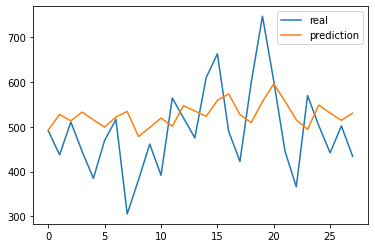

In [61]:
df_resultados.plot()

### 3 días

In [15]:
dias = 3

In [16]:
df_semanal = df.rolling(window=10*dias).mean()

In [17]:
df_semanal = df_semanal.iloc[10*dias:]

In [18]:
df_semanal.head(1)

,SRGLOAVG1H,TAMAX1H,TAMIN1H,RHMAX1H,RHMIN1H,PRSUM1H,PAAVG1H,PAMAX1H,PAMIN1H,WS1HA,WS1HX,WD1HA
Local_Time,,,,,,,,,,,,
2015-01-04 08:00:00,392.466667,17.253333,15.493333,70.233333,59.466667,0.0,742.05,742.3,741.803333,4.503333,9.793333,59.133333


In [19]:
df_rs = df_semanal['SRGLOAVG1H']

In [20]:
promedios_train = [df_rs[i] for i in range(0,len(df_rs),10*dias)]

In [21]:
len(promedios_train)

194

In [22]:
stepwise_model = auto_arima(promedios_train,seasonal=False,max_order=None,max_p = 10, max_q = 10)

El mejor modelo utiliza un retraso MA.

In [23]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  194
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1148.103
Date:                Fri, 22 Apr 2022   AIC                           2302.205
Time:                        17:32:12   BIC                           2312.009
Sample:                             0   HQIC                          2306.175
                                - 194                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    396.8908     10.438     38.024      0.000     376.433     417.349
ma.L1          0.3454      0.060      5.711      0.000       0.227       0.464
sigma2      8083.5267    731.857     11.045      0.000    6649.113    9517.940
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                52.80
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             1.00
Prob(H) (two-sided):                  0.79   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Se guardan los parámetros del mejor modelo.

In [25]:
params = stepwise_model.params()
params

array([3.96890804e+02, 3.45429553e-01, 8.08352674e+03])

Se obtienen los datos de prueba.

In [24]:
df_semanal_test = df_test.rolling(window=10*dias).mean()
df_semanal_test = df_semanal_test.iloc[10*dias:]
df_rs_test = df_semanal_test['SRGLOAVG1H']
promedios_semanales_test = [df_rs_test[i] for i in range(0,len(df_rs_test),10*dias)]
len(promedios_semanales_test)

48

Se predicen los datos de test.

In [28]:
predictions = []
for i in range(len(promedios_semanales_test)-1):  
  modelB = sm.tsa.SARIMAX([promedios_semanales_test[i]], order=(0, 0, 1))
  resB = modelB.smooth(params[1:])
  predictions.append((resB.forecast(1))[0])

In [29]:
predictions = np.array(predictions)
predictions+=stepwise_model.params()[0]

In [30]:
len(predictions)

47

In [31]:
MSE = mean_squared_error(promedios_semanales_test[1:],predictions)
np.sqrt(MSE)

123.92723053960839

In [32]:
mean_absolute_error(promedios_semanales_test[1:],predictions)

100.7504294963099

In [33]:
df_resultados = {
    'real':promedios_semanales_test[1:],
    'prediction':predictions
}

In [34]:
df_resultados = pd.DataFrame(df_resultados)

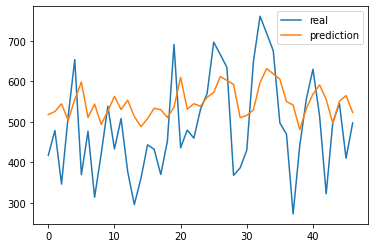

In [35]:
df_resultados.plot()

El modelo que utiliza promedios de 5 días tiene el error más pequeño.